# 2. 기준이 필요해

In [7]:
import pandas as pd
import xlwings as xw

import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

path = r'data/시도별_1인당_지역내총생산__지역총소득__개인소득_20211204112725.xlsx'
raw = pd.read_excel(path, sheet_name='데이터', index_col=0)
raw.drop(['시도별'], inplace=True)
raw

/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
시도별,,,,,,,,,,,,,,,,,,,,
전국,8694,9120,9820,10389,11063,11551,12058,12636,13425,13811,14558,15137,15711,16432,17006,18063,18520,19204,19910,20661
서울특별시,9978,10511,11463,12285,13044,13525,14008,15023,15783,16080,17277,18252,18795,19525,19832,20857,21295,22237,23323,23978
부산광역시,8296,8584,9330,9685,10164,10695,11323,11855,12699,12993,13605,14396,15098,15651,16147,17044,17525,18189,18868,19723
대구광역시,8274,8622,9246,9494,10052,10693,11193,11503,12279,12851,13446,13969,14554,15320,16031,17226,17848,18350,18555,19196
인천광역시,7651,7997,8700,9280,9937,10344,10769,11151,11843,12334,13214,13600,14181,14829,15507,16598,17222,17884,18659,19582
광주광역시,7969,8540,9011,9610,10103,10865,11389,12137,12902,13298,13439,13815,14662,15454,16225,17459,18232,18926,19868,20791
대전광역시,8230,8658,9288,10072,10563,11133,11755,12339,13070,13701,14373,14992,15537,16253,16946,18229,18741,19314,19649,20648
울산광역시,10271,11012,11896,12603,13422,14129,14426,15502,16438,16950,17634,18594,18941,19782,20142,21348,21422,21956,21655,22617
세종특별자치시,-,-,-,-,-,-,-,-,-,-,-,-,-,17607,22944,21957,21000,21404,20990,20674


In [12]:
# 인덱스의 시도 이름을 약어로 변경

index_list = raw.index

new_index = []
for temp in index_list:
    if temp[-1] == '시':
        new_index.append(temp[:2])
    elif temp[-1] == '도':
        if len(temp) == 3:
            new_index.append(temp[:2])
        elif len(temp) == 4:
            new_index.append(temp[0] + temp[2])
        else:
            new_index.append('제주')
    else:
        new_index.append(temp)
        
raw.index = new_index
raw

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
전국,8694,9120,9820,10389,11063,11551,12058,12636,13425,13811,14558,15137,15711,16432,17006,18063,18520,19204,19910,20661
서울,9978,10511,11463,12285,13044,13525,14008,15023,15783,16080,17277,18252,18795,19525,19832,20857,21295,22237,23323,23978
부산,8296,8584,9330,9685,10164,10695,11323,11855,12699,12993,13605,14396,15098,15651,16147,17044,17525,18189,18868,19723
대구,8274,8622,9246,9494,10052,10693,11193,11503,12279,12851,13446,13969,14554,15320,16031,17226,17848,18350,18555,19196
인천,7651,7997,8700,9280,9937,10344,10769,11151,11843,12334,13214,13600,14181,14829,15507,16598,17222,17884,18659,19582
광주,7969,8540,9011,9610,10103,10865,11389,12137,12902,13298,13439,13815,14662,15454,16225,17459,18232,18926,19868,20791
대전,8230,8658,9288,10072,10563,11133,11755,12339,13070,13701,14373,14992,15537,16253,16946,18229,18741,19314,19649,20648
울산,10271,11012,11896,12603,13422,14129,14426,15502,16438,16950,17634,18594,18941,19782,20142,21348,21422,21956,21655,22617
세종,-,-,-,-,-,-,-,-,-,-,-,-,-,17607,22944,21957,21000,21404,20990,20674
경기,9142,9422,10122,10608,11299,11622,12196,12740,13581,13760,14455,15041,15647,16399,16969,18069,18611,19375,19907,20746


In [13]:
income_data = raw.T
income_data

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2000,8694,9978,8296,8274,7651,7969,8230,10271,-,9142,7442,7694,8035,7684,7714,8116,8217,8259
2001,9120,10511,8584,8622,7997,8540,8658,11012,-,9422,7850,8192,8349,8189,8142,8611,8743,8729
2002,9820,11463,9330,9246,8700,9011,9288,11896,-,10122,8491,8658,8929,8517,8716,9207,9291,9314
2003,10389,12285,9685,9494,9280,9610,10072,12603,-,10608,8960,9030,9454,9242,9219,9593,9912,9679
2004,11063,13044,10164,10052,9937,10103,10563,13422,-,11299,9589,9758,10075,9844,10036,10315,10636,10082
2005,11551,13525,10695,10693,10344,10865,11133,14129,-,11622,10036,10403,10417,10448,10644,10946,11101,10552
2006,12058,14008,11323,11193,10769,11389,11755,14426,-,12196,10530,10840,10994,10922,11110,11202,11611,11125
2007,12636,15023,11855,11503,11151,12137,12339,15502,-,12740,10863,11247,11365,11387,11424,11391,11967,11544
2008,13425,15783,12699,12279,11843,12902,13070,16438,-,13581,11683,11983,12006,12060,12013,12156,12970,12411
2009,13811,16080,12993,12851,12334,13298,13701,16950,-,13760,12330,12615,12660,12649,12643,12657,13316,12809


## PIR 데이터 시각화

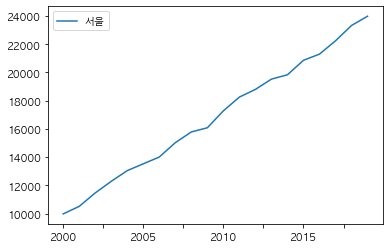

In [15]:
income_data['서울']['2000':].plot(legend='서울')
plt.show()

In [ ]:
# 특정지역들의 부동산 가격지수 변화와 개인소득 변화
location_list = ['전국', '서울', '부산', '대구', '대전', '광주', '경기']
start_year = 2000
end_year = 2019

num_row = int((len(location_list)-1)/2)+1
plt.figure(figsize=(12,num_row*5))

for j, location in enumerate(location_list):
    year_data = []
    for i, in range(int(start_year), int(end_year)+1):
        if location == '제주':
            year_data.append(price_data)